In [1]:
from scipy.stats import kruskal
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt


import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer


import re
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##Topic Modeling

In [2]:
!pip install gensim

In [3]:
from gensim import corpora, models
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

##Topic Modeling Based on Star Ratings

In [7]:
%%capture
!pip install bertopic

In [4]:
import pandas as pd
df = pd.read_csv('topicModelling.csv', encoding="ISO-8859-1")
df.head()

review  rating  \
0  Why does it look like someone spit on my food?...       1   
1  It'd McDonalds. It is what it is as far as the...       4   
2  Made a mobile order got to the speaker and che...       1   
3  My mc. Crispy chicken sandwich was Ã¯Â¿Â½Ã¯Â¿Â...       5   
4  I repeat my order 3 times in the drive thru, a...       1   

                                         cleanReview  \
0  whi doe look like someon spit food normal tran...   
1  itd mcdonald far food atmospher go staff doe m...   
2  made mobil order got speaker check line wa mov...   
3  mc crispi chicken sandwich wa custom servic wa...   
4  repeat order 3 time drive thru still manag mes...   

                                       reviewForBERT  
0  Why does it look like someone spit on my food\...  
1  Itd McDonalds It is what it is as far as the f...  
2  Made a mobile order got to the speaker and che...  
3  My mc Crispy chicken sandwich was  customer se...  
4  I repeat my order 3 times in the drive thru an...

In [5]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def remove_stop_words(text):
    if isinstance(text, str):
        stop_words = set(stopwords.words('english')) | ENGLISH_STOP_WORDS
        words = text.split()
        filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
        return ' '.join(filtered_words)
    else:
        return ''  # or return some default value if the input is not a string

# Apply the function to the 'reviewForBERT' column and create a new column 'reviewWithoutStopWords'
df['reviewWithoutStopWords'] = df['reviewForBERT'].apply(remove_stop_words)

# Display the updated DataFrame
print(df)


                                                  review  rating  \
0      Why does it look like someone spit on my food?...       1   
1      It'd McDonalds. It is what it is as far as the...       4   
2      Made a mobile order got to the speaker and che...       1   
3      My mc. Crispy chicken sandwich was Ã¯Â¿Â½Ã¯Â¿Â...       5   
4      I repeat my order 3 times in the drive thru, a...       1   
...                                                  ...     ...   
33391                        They treated me very badly.       1   
33392                           The service is very good       5   
33393                         To remove hunger is enough       4   
33394  It's good, but lately it has become very expen...       5   
33395                          they took good care of me       5   

                                             cleanReview  \
0      whi doe look like someon spit food normal tran...   
1      itd mcdonald far food atmospher go staff doe m...   
2  

In [10]:
#Identifying top 3 topics in each star rating with their review samples
# Function to perform topic modeling
def perform_topic_modeling(df, num_topics=3, num_sample_reviews=3):
    # Tokenize the text
    tokenized_text = df['reviewWithoutStopWords'].apply(lambda x: x.split())

    # Create a dictionary representation of the documents
    dictionary = corpora.Dictionary(tokenized_text)

    # Convert tokenized documents into a document-term matrix
    corpus = [dictionary.doc2bow(text) for text in tokenized_text]

    # Train LDA model
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)

    # Display the topics
    for topic_idx in range(num_topics):
        print(f"\nTopic #{topic_idx + 1}: {lda_model.print_topic(topic_idx)}")

        # Print three random reviews for each topic
        print("Sample Reviews:")
        sample_reviews = df.sample(num_sample_reviews)['reviewWithoutStopWords']
        for i, review in enumerate(sample_reviews):
            print(f"{i + 1}. {review}")
        print()

# Perform topic modeling for each rating category
print("1 - Star Rating")
perform_topic_modeling(df[df['rating'] == 1])
print("2 - Star Rating")
perform_topic_modeling(df[df['rating'] == 2])
print("3 - Star Rating")
perform_topic_modeling(df[df['rating'] == 3])
print("4 - Star Rating")
perform_topic_modeling(df[df['rating'] == 4])
print("5 - Star Rating")
perform_topic_modeling(df[df['rating'] == 5])

1 - Star Rating

Topic #1: 0.035*"service" + 0.025*"mcdonalds" + 0.020*"food" + 0.017*"worst" + 0.015*"place" + 0.014*"dont" + 0.013*"staff" + 0.013*"rude" + 0.013*"bad" + 0.012*"customer"
Sample Reviews:
1. ordered bacon egg cheese biscuit meal bacon send 2 complimentary meals great free coupon gave chicken sandwich ordered signature burger called office let know care corporate chicago like
2. ordered times mcdonalds screw cheeseburger asked ketchup mustard pickles onion got condiments meat mean really learn read pay attention 3rd time happened
3. restroom bad service


Topic #2: 0.017*"food" + 0.015*"fries" + 0.014*"open" + 0.014*"closed" + 0.011*"hours" + 0.011*"like" + 0.009*"place" + 0.009*"cold" + 0.009*"dirty" + 0.008*"24"
Sample Reviews:
1. bad service took 30 minutes food cashier forget son food wait food 15 minutes
2. want apologize recommended particular mcdonalds past restaurant used recommend tourists looking fast place eat away disney parks close parks quickly time worth 

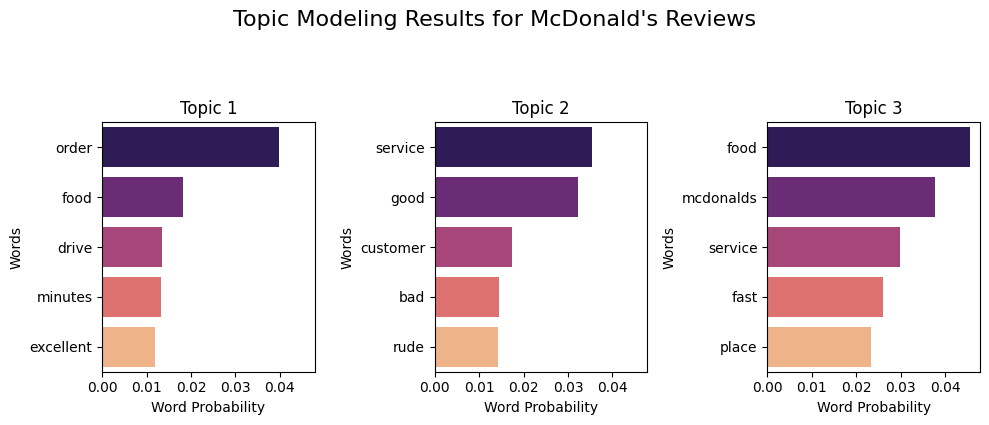

1 - Star Rating


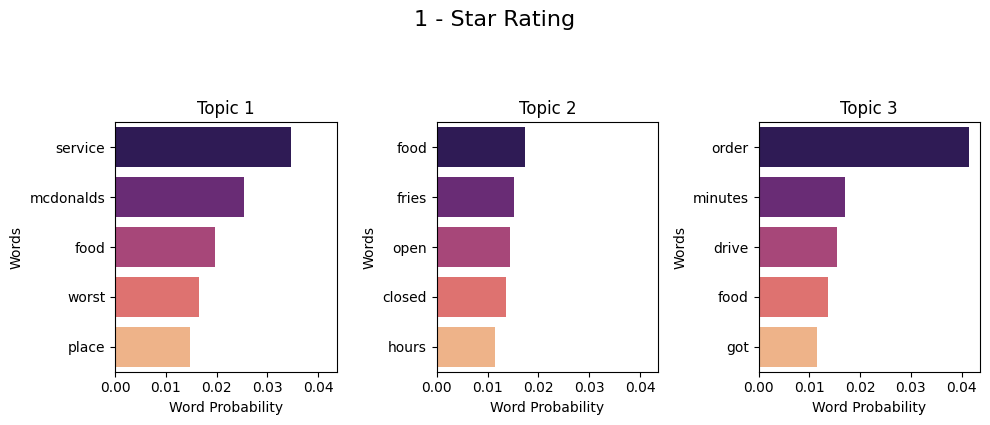

2 - Star Rating


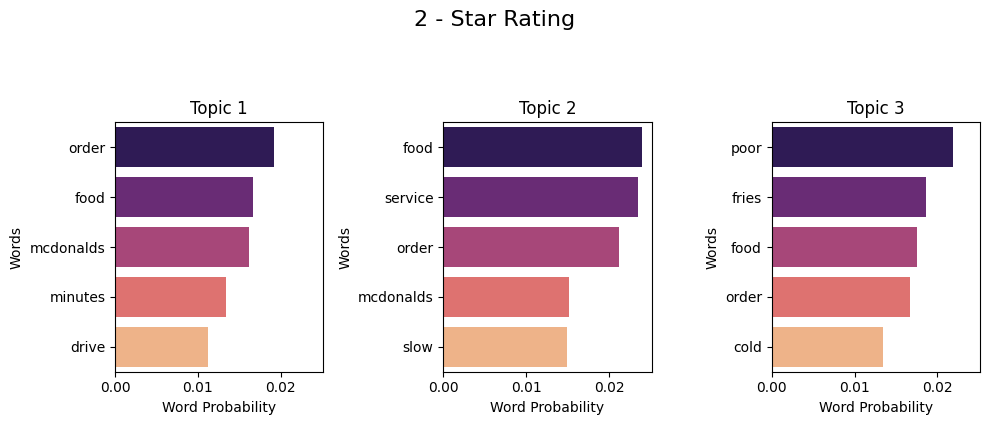

3 - Star Rating


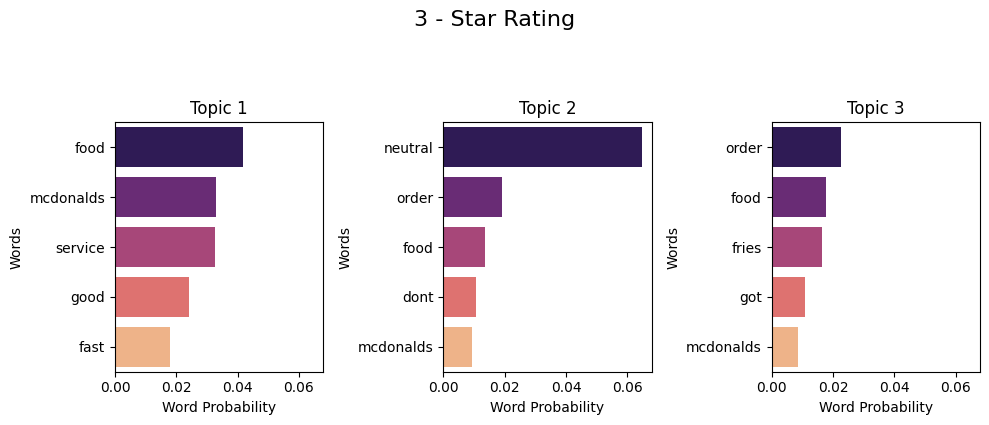

4 - Star Rating


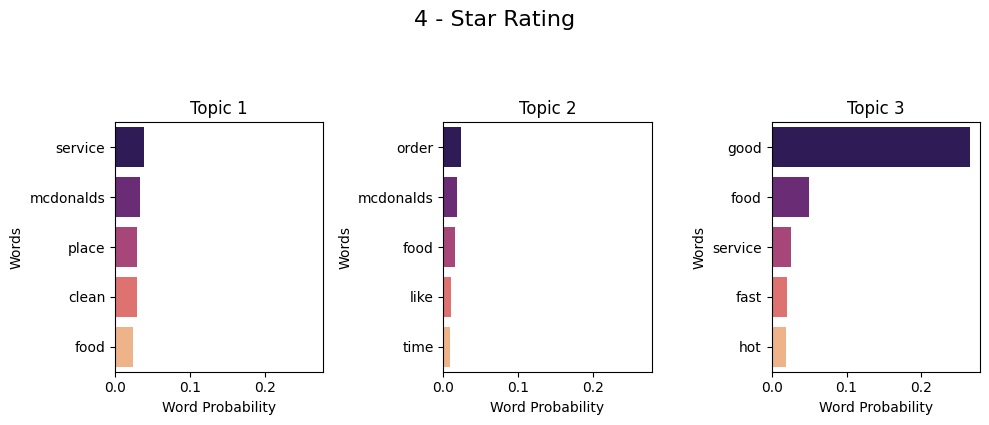

5 - Star Rating


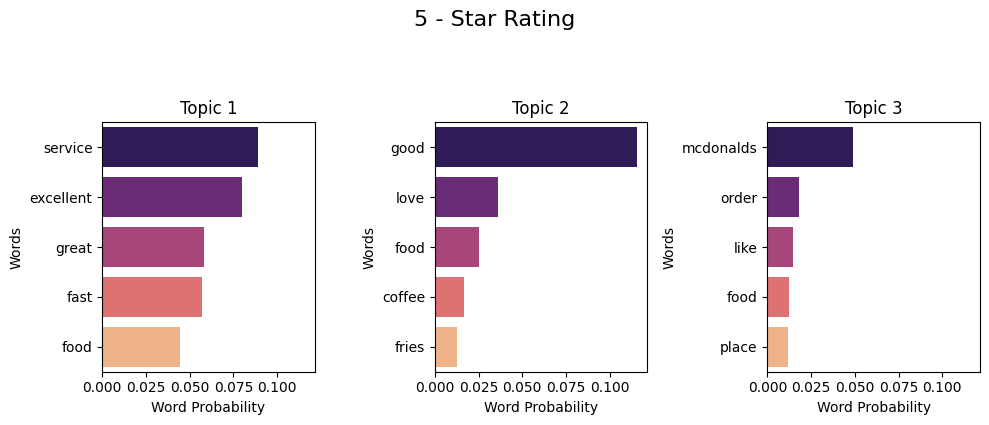

In [9]:
#visualizing those top 3 topics in each star ratings
def perform_topic_modeling(df,graph_title, num_topics=3, num_sample_reviews=3):

    # Tokenize the text
    tokenized_text = df['reviewWithoutStopWords'].apply(lambda x: x.split())

    # Create a dictionary representation of the documents
    dictionary = corpora.Dictionary(tokenized_text)

    # Convert tokenized documents into a document-term matrix
    corpus = [dictionary.doc2bow(text) for text in tokenized_text]

    # Train LDA model
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)

    topics = lda_model.show_topics(num_topics=lda_model.num_topics, num_words=5, formatted=False)

    fig, axes = plt.subplots(1, lda_model.num_topics, figsize=(10, 4), sharex=True)
    axes = axes.flatten()

    for i, (topic, ax) in enumerate(zip(topics, axes)):
        topic_words = [word for word, _ in topic[1]]
        word_probs = [count for _, count in topic[1]]

        sns.barplot(x=word_probs, y=topic_words, ax=ax, palette='magma')
        ax.set_title(f'Topic {i + 1}')
        ax.set_xlabel('Word Probability')
        ax.set_ylabel('Words')

    plt.suptitle(graph_title, y=1.05, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to prevent the title from being cut off
    plt.show()

# Example usage:
perform_topic_modeling(df, num_topics=3, num_sample_reviews=3, graph_title="Topic Modeling Results for McDonald's Reviews")


# Perform topic modeling for each rating category
print("1 - Star Rating")
perform_topic_modeling(df[df['rating'] == 1],graph_title = '1 - Star Rating')
print("2 - Star Rating")
perform_topic_modeling(df[df['rating'] == 2], graph_title = '2 - Star Rating')
print("3 - Star Rating")
perform_topic_modeling(df[df['rating'] == 3], graph_title = '3 - Star Rating')
print("4 - Star Rating")
perform_topic_modeling(df[df['rating'] == 4], graph_title = '4 - Star Rating')
print("5 - Star Rating")
perform_topic_modeling(df[df['rating'] == 5], graph_title = '5 - Star Rating')

##Bert Topic Modeling:

In [12]:
#Performed Bert topic modeling for further analysis
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

In [13]:
# Use a Sentence Transformer model for embedding sentences
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Create BERTopic model
bertopic_model = BERTopic(language="english", embedding_model=model)


# Handle missing values
df['reviewWithoutStopWords'] = df['reviewWithoutStopWords'].fillna('')

# Fit the model on the review data
topics, _ = bertopic_model.fit_transform(df['reviewWithoutStopWords'])

# Visualize the topics
bertopic_model.visualize_topics()

.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [14]:
bertopic_model.visualize_hierarchy(top_n_topics=30)

In [15]:
bertopic_model.visualize_barchart(top_n_topics=5)

In [16]:
bertopic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)